In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')

In [ ]:
# age: The person's age in years
# sex: The person's sex (1 = male, 0 = female)
# cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
# trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
# chol: The person's cholesterol measurement in mg/dl
# fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
# restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
# thalach: The person's maximum heart rate achieved
# exang: Exercise induced angina (1 = yes; 0 = no)
# oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
# slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
# ca: The number of major vessels (0-3)
# thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
# target: Heart disease (0 = no, 1 = yes)

In [3]:
df.head(7)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
5   0     1       1  
6   0     2       1

In [4]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
# DF columns
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
# Random 1% sample
df.sample(frac=0.01)

303

In [11]:
df.shape

(303, 14)

In [13]:
# Check null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [16]:
df.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
target   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trestbps -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalach   0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exang    -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slope     0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
ca       -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thal     -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
target    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

              thal    target  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trestbps  0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalach  -0.096439  0.421741  
exang     0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slope    -0.104764  0.345877  
ca        0.151832 -0.391724  
thal      1.000000 -0.344029  
target   -0.344029  1.000000

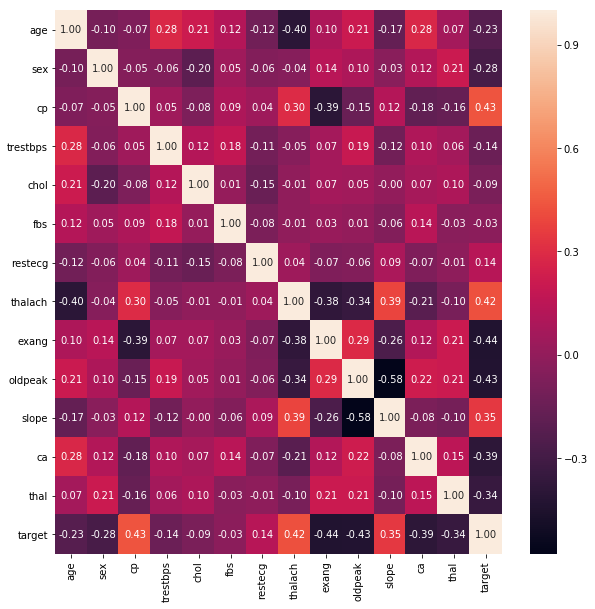

In [21]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

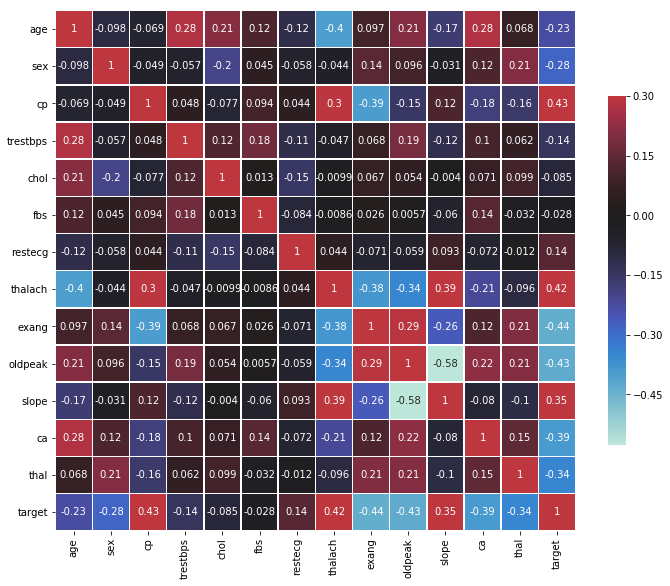

In [23]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), vmax=0.3, center=0, square=True,
           linewidths=0.5, cbar_kws={"shrink": 0.5}, annot=True)
plt.tight_layout()
plt.show()

/home/apoorv/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/apoorv/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


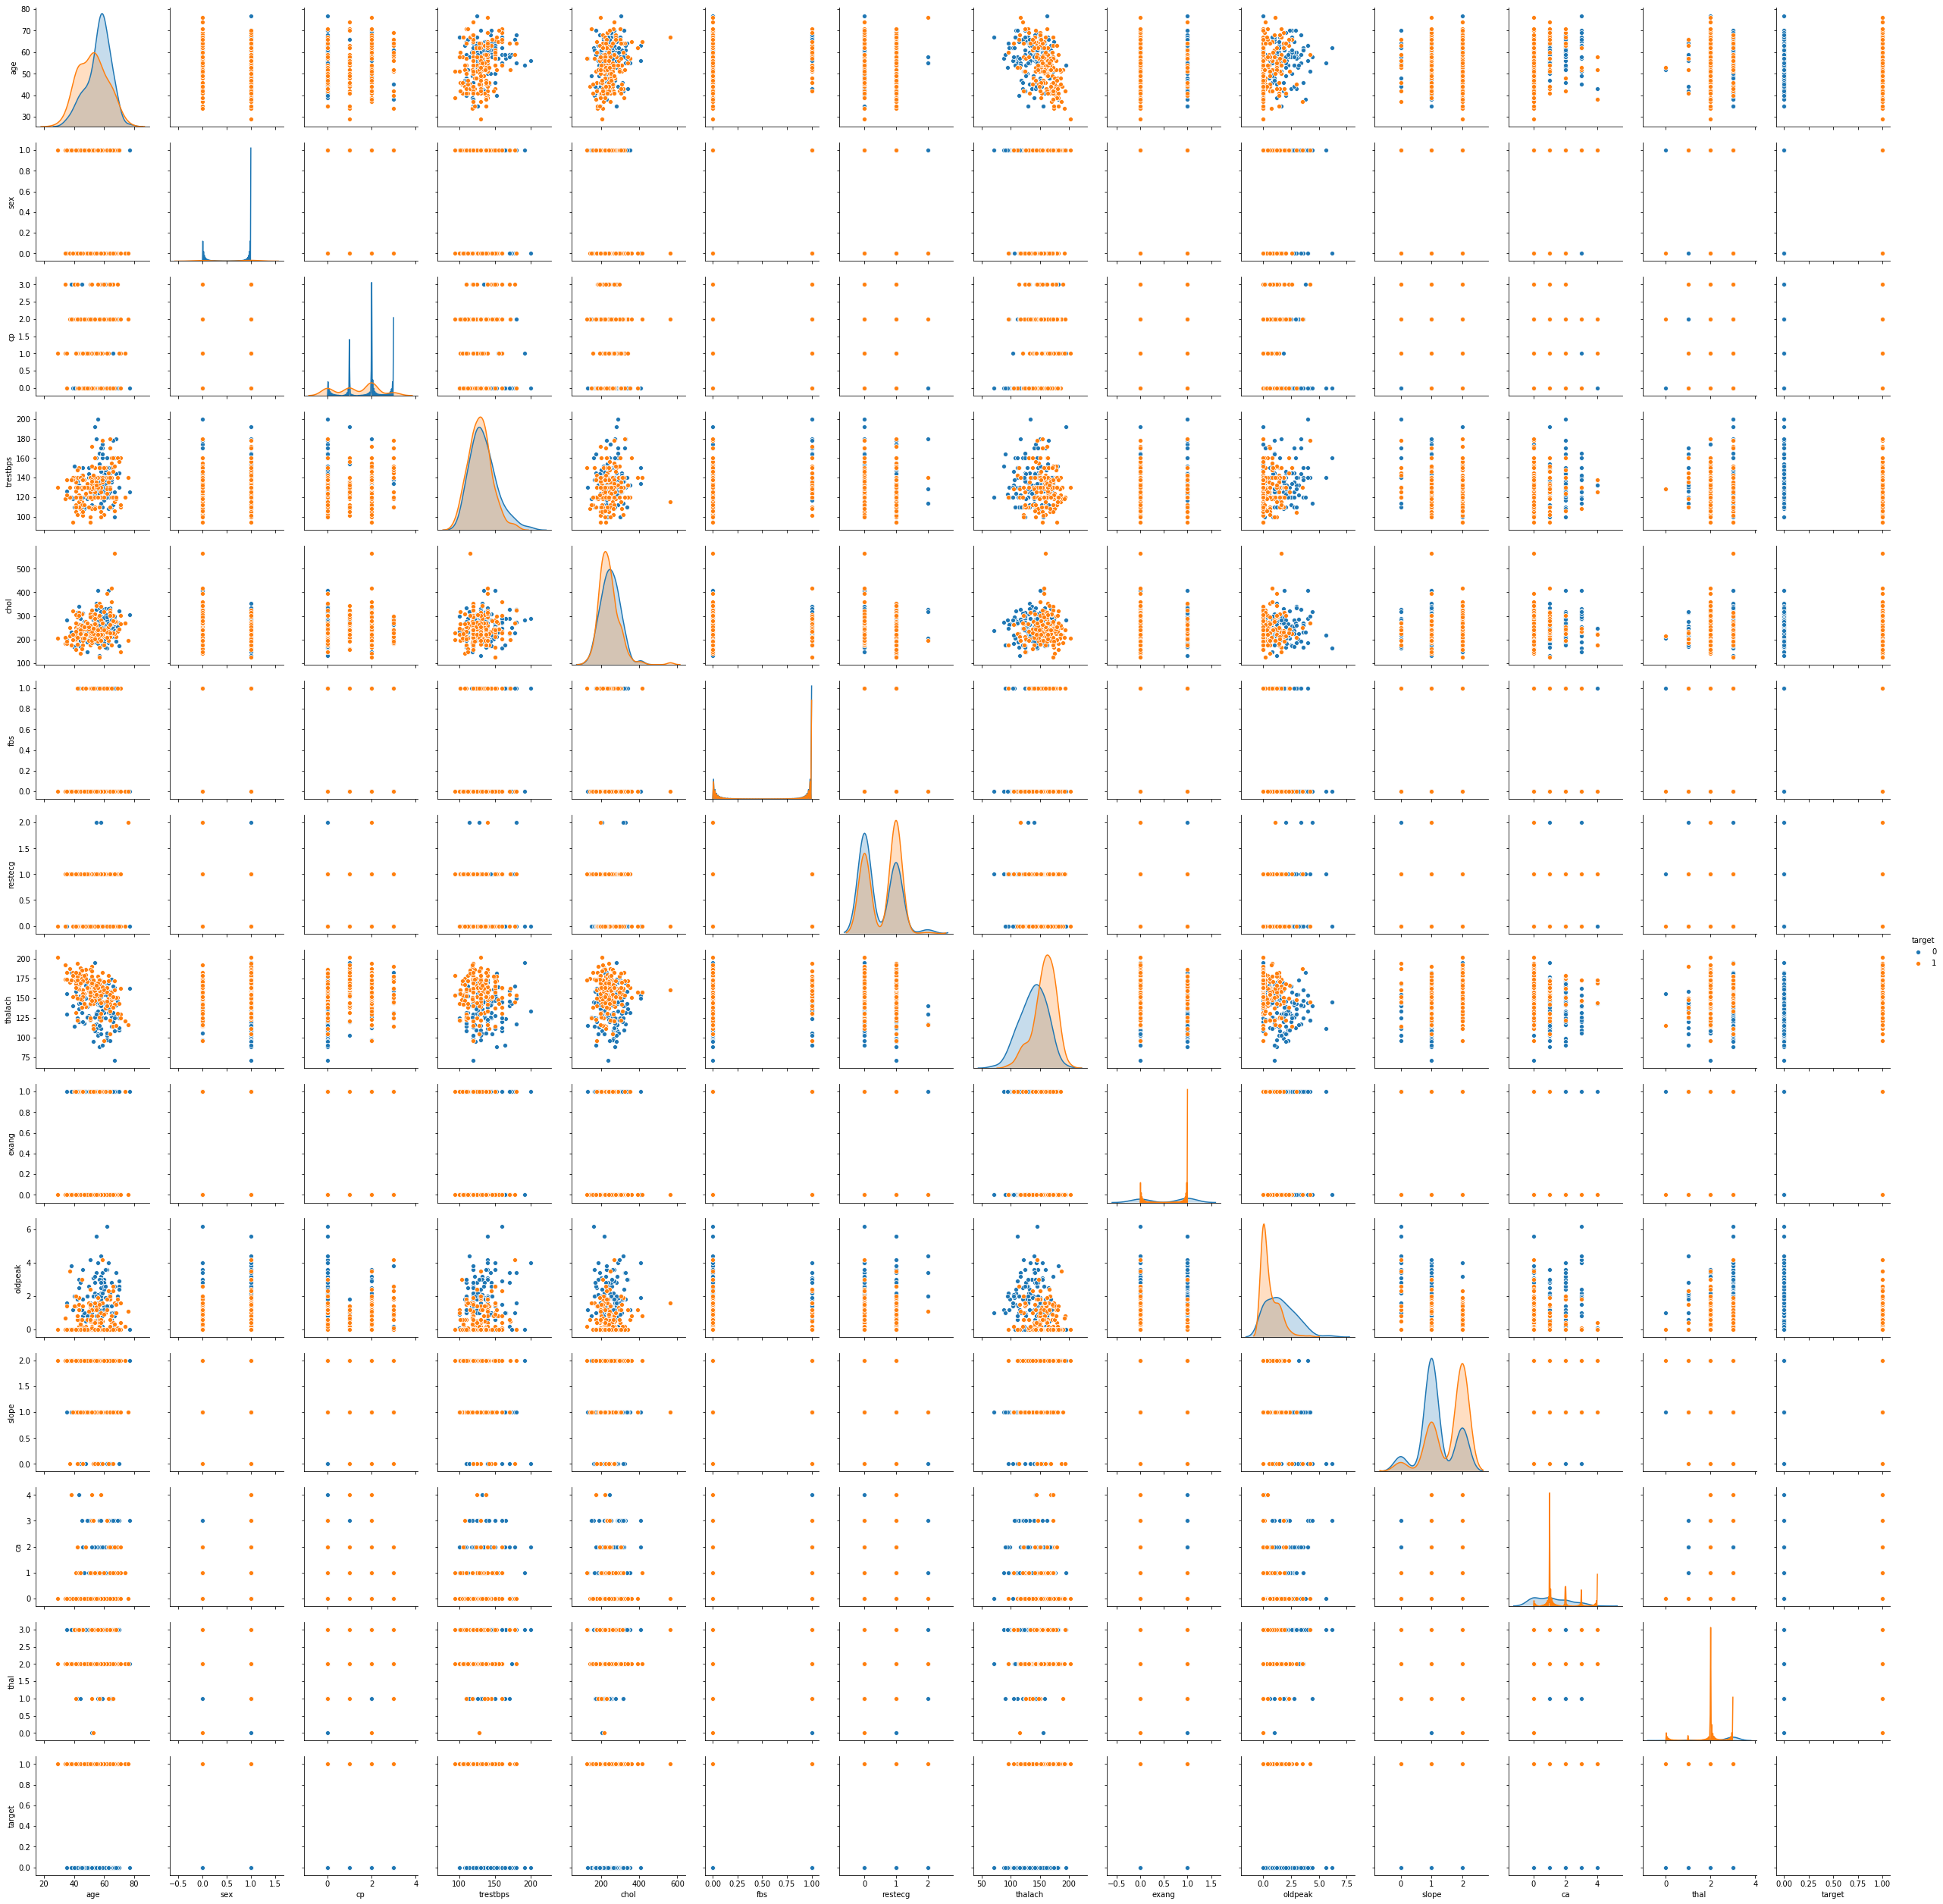

In [25]:
sns.pairplot(df, hue="target")
plt.show()

In [29]:
df['age'].value_counts()[:15].index

Int64Index([58, 57, 54, 59, 52, 51, 62, 44, 60, 56, 64, 41, 63, 67, 55], dtype='int64')

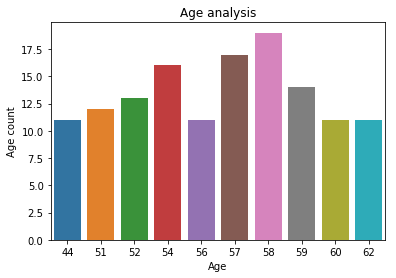

In [31]:
sns.barplot(x=df['age'].value_counts()[:10].index, y=df['age'].value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('Age count')
plt.title('Age analysis')
plt.show()

In [34]:
min_age = min(df['age'])
max_age = max(df['age'])
mean_age = df['age'].mean()
print(f"Min age : {min_age}")
print(f"Max age : {max_age}")
print(f"Mean age : {mean_age}")

Min age : 29
Max age : 77
Mean age : 54.366336633663366


In [36]:
young_ages = df[(df['age']>=29) & (df['age']<40)]
middle_ages = df[(df['age']>=40) & (df['age']<55)]
elderly_ages = df[(df['age']>55)]
print(f"Young people : {len(young_ages)}")
print(f"Middle aged : {len(middle_ages)}")
print(f"Old people : {len(elderly_ages)}")

Young people : 16
Middle aged : 128
Old people : 151


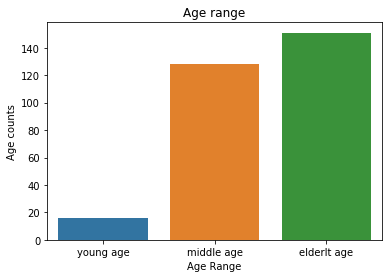

In [37]:
sns.barplot(x=['young age', 'middle age', 'elder age'], y=[len(young_ages), len(middle_ages), len(elderly_ages)])
plt.xlabel('Age Range')
plt.ylabel('Age counts')
plt.title('Age range')
plt.show()

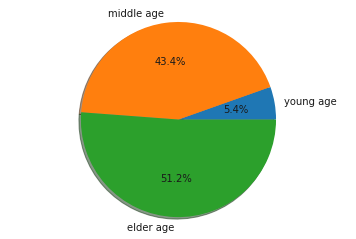

In [54]:
labels = ['young age', 'middle age', 'elder age']
sizes = [len(young_ages), len(middle_ages), len(elderly_ages)]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
# plt.pie(sizes ,labels=labels, explode=explode, colors=colors, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

In [41]:
df['AgeRange'] = 0
youngAge_index = df[(df['age'] >= 29) & (df['age'] < 40)].index
middleAge_index = df[(df['age'] >= 40) & (df['age'] < 55)].index
elderlyAge_index = df[(df['age'] >= 55)].index

In [44]:
for index in elderlyAge_index:
    df.loc[index, 'AgeRange'] = 2
    
for index in middleAge_index:
    df.loc[index, 'AgeRange'] = 1

for index in youngAge_index:
    df.loc[index, 'AgeRange'] = 0

In [45]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  AgeRange  
0   0     1       1         2  
1   0     2       1         0  
2   0     2       1         1  
3   0     2       1         2  
4   0     2       1         2

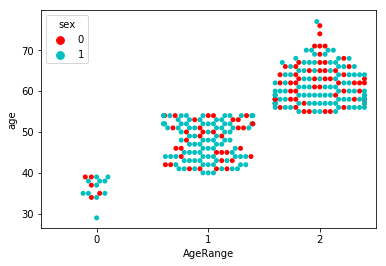

In [46]:
# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="AgeRange", y="age", hue='sex',
              palette=["r", "c", "y"], data=df)
plt.show()

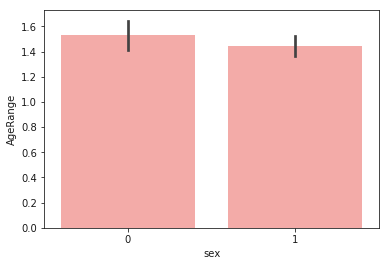

In [48]:
sns.set_color_codes("pastel")
sns.barplot(x="sex", y="AgeRange", data=df,
            label="Total", color="r")
plt.show()

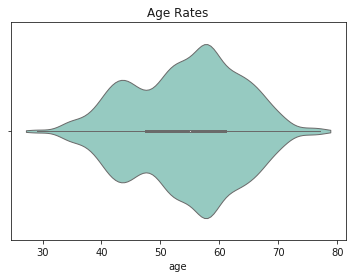

In [51]:
sns.violinplot(df['age'], palette="Set3", bw=.2, cut=1, linewidth=1)
plt.title("Age Rates")
plt.show()

In [55]:
df['sex'].value_counts()
# 1 : male, 0 : female

1    207
0     96
Name: sex, dtype: int64

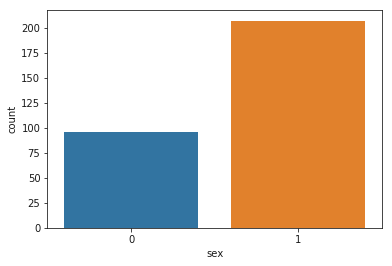

In [57]:
sns.countplot(df['sex'])
plt.show()

In [60]:
total_genders_count = len(df['sex'])
male_count = len(df[df['sex'] == 1])
female_count=len(df[df['sex'] == 0])
print('Total Genders :', total_genders_count)
print('Male Count    :', male_count)
print('Female Count  :', female_count)

print("Male State: {:.2f}%".format((male_count / (total_genders_count)*100)))
print("Female State: {:.2f}%".format((female_count / (total_genders_count)*100)))

Total Genders : 303
Male Count    : 207
Female Count  : 96
Male State: 68.32%
Female State: 31.68%


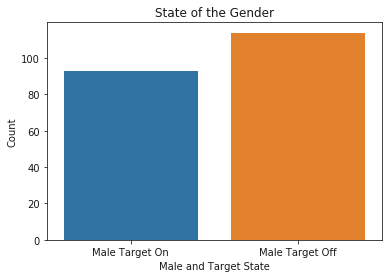

In [61]:
#Male State & target 1 & 0
male_andtarget_on = len(df[(df['sex']==1)&(df['target']==1)])
male_andtarget_off = len(df[(df['sex']==1)&(df['target']==0)])

sns.barplot(x=['Male Target On', 'Male Target Off'], y=[male_andtarget_on, male_andtarget_off])
plt.xlabel('Male and Target State')
plt.ylabel('Count')
plt.title('State of the Gender')
plt.show()

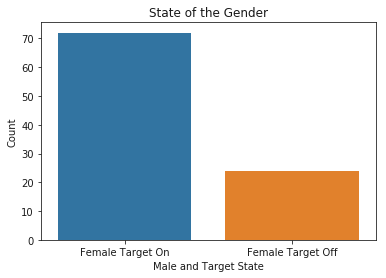

In [62]:
female_andtarget_on = len(df[(df['sex']==0)&(df['target']==1)])
female_andtarget_off = len(df[(df['sex']==0)&(df['target']==0)])

sns.barplot(x=['Female Target On', 'Female Target Off'], y=[female_andtarget_on, female_andtarget_off])
plt.xlabel('Male and Target State')
plt.ylabel('Count')
plt.title('State of the Gender')
plt.show()

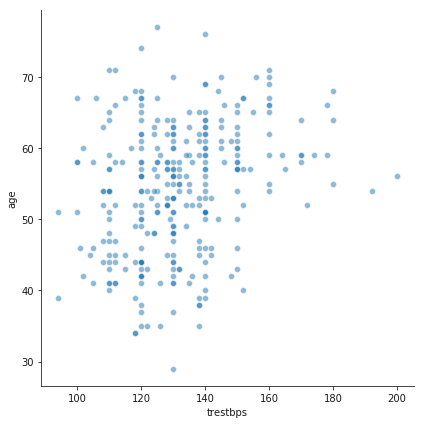

In [64]:
# df.head()
sns.relplot(x="trestbps", y="age",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

In [65]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  AgeRange  
0   0     1       1         2  
1   0     2       1         0  
2   0     2       1         1  
3   0     2       1         2  
4   0     2       1         2

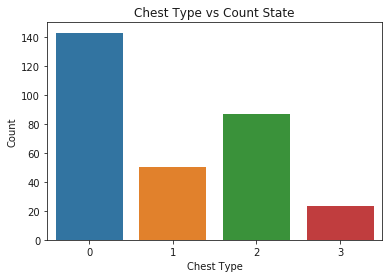

In [69]:
df['cp'].value_counts()

sns.countplot(df['cp'])
plt.xlabel('Chest Type')
plt.ylabel('Count')
plt.title('Chest Type vs Count State')
plt.show()
#0 status at least
#1 condition slightly distressed
#2 condition medium problem
#3 condition too bad

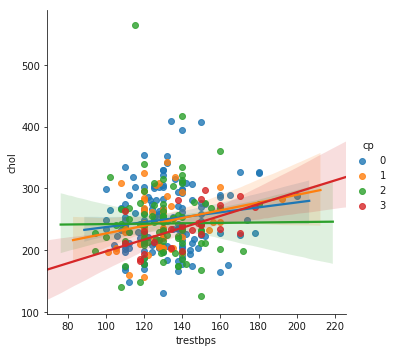

In [71]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="trestbps", y="chol", data=df, hue="cp")
plt.show()

In [74]:
# df.head()
df['thalach'].value_counts()[:20]

162    11
160     9
163     9
173     8
152     8
125     7
132     7
150     7
172     7
143     7
144     7
156     6
169     6
158     6
140     6
142     6
178     5
161     5
154     5
165     5
Name: thalach, dtype: int64

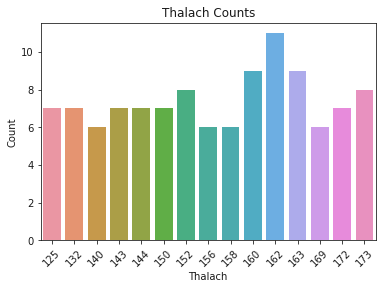

In [76]:
sns.barplot(x=df['thalach'].value_counts()[:15].index, y=df['thalach'].value_counts()[:15].values)
plt.xlabel('Thalach')
plt.ylabel('Count')
plt.title('Thalach Counts')
plt.xticks(rotation=45)
plt.show()

In [87]:
age_unique = sorted(df['age'].unique())
age_thalach_values = df.groupby('age')['thalach'].count().values
# print(age_thalach_values)
mean_thalach = []
for i, age in enumerate(age_unique):
    mean_thalach.append( sum(df[df['age']==age]['thalach'])/age_thalach_values[i] )

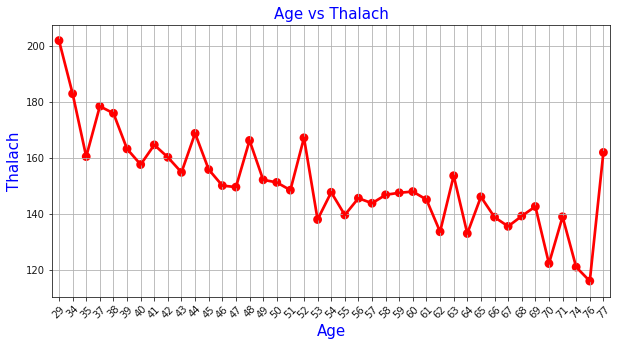

In [89]:
plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique, y=mean_thalach, color='red', alpha=0.8)
plt.xlabel('Age',fontsize=15, color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15,color='blue')
plt.title('Age vs Thalach',fontsize = 15,color='blue')
plt.grid()
plt.show()

In [92]:
#determine the age ranges of patients with and without sickness and make analyzes about them
age_counter_target_1 = []
age_counter_target_0 = []
for age in df['age'].unique():
    age_counter_target_1.append(len(df[(df['age'] == age)&(df['target'] == 1)]))
    age_counter_target_0.append(len(df[(df['age'] == age)&(df['target'] == 0)]))

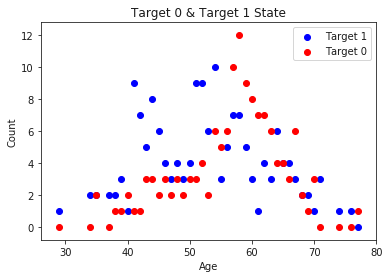

In [94]:
plt.scatter(x=df['age'].unique(), y=age_counter_target_1, color='blue', label='Target 1')
plt.scatter(x=df['age'].unique(), y=age_counter_target_0, color='red',label='Target 0')
plt.legend(loc='upper right', frameon=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Target 0 & Target 1 State')
plt.show()

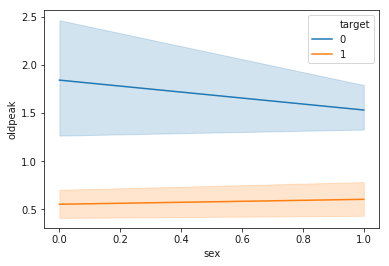

In [95]:
sns.lineplot(x="sex", y="oldpeak",
             hue="target",data=df)
plt.show()

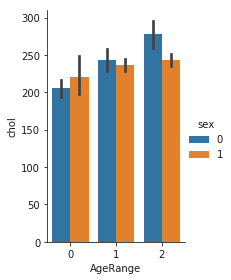

In [100]:
plt.figure(figsize=(8, 5))
g = sns.catplot(x="AgeRange", y="chol",
                 hue="sex",
                 data=df, kind="bar",
                 height=4, aspect=.7)
plt.show()

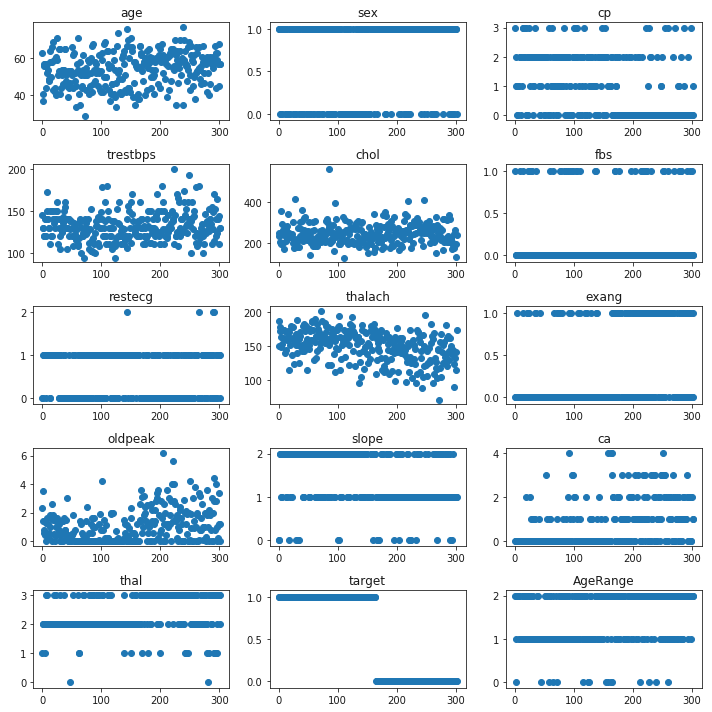

In [101]:
for i, col in enumerate(df.columns.values):
    plt.subplot(5,3,i+1)
    plt.scatter([i for i in range(303)], df[col].values.tolist())
    plt.title(col)
    fig,ax=plt.gcf(),plt.gca()
    fig.set_size_inches(10,10)
    plt.tight_layout()
plt.show()